In [30]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import datetime
import pandas as pd

In [31]:
def get_density(image):
    return image[image!=0].mean()

In [32]:
def make_df(dir_path):
    files           = os.listdir(dir_path)
    df              = pd.DataFrame()
    dates           = list()
    density_vv_list = list()
    density_vh_list = list()

    for f in files:
        date        = "/".join(f.split("_")[:3])
        date_format = datetime.datetime.strptime(date, '%d/%m/%y')
        dates.append(date_format)

    df["Date"]  = dates
    df          = df.drop_duplicates()
    df          = df.sort_values("Date")

    for d in df["Date"]:
        try :
            string_date = d.strftime('%d_%m_%y')

            image_vv    = f'{dir_path}/{string_date}_vv.png'
            image_vh    = f'{dir_path}/{string_date}_vh.png'

            density_vv  = get_density(cv2.imread(image_vv, cv2.COLOR_BGR2GRAY))
            density_vh  = get_density(cv2.imread(image_vh, cv2.COLOR_BGR2GRAY))

            density_vv_list.append(density_vv)
            density_vh_list.append(density_vh)

        except Exception as e:
            print(f"For {d}\t> {e}")
            density_vv_list.append(None)
            density_vh_list.append(None)

    df["VV"]     = density_vv_list
    df["VH"]     = density_vh_list
    df["CR"]     = df["VV"].values/df["VH"].values

    df = df.dropna()

    return df

In [33]:
def plot_evolution(df, FigAx = None):

    single = False

    if FigAx is None:
        fig, ax1 = plt.subplots(figsize=(10, 5))
        single = True
    else : 
        fig, ax1 = FigAx[0], FigAx[1]
        
    ax1.plot(df["Date"], df["VV"].values, label='VV', color='b')
    ax1.plot(df["Date"], df["VH"].values, label='VH', color='r')
    ax1.set_xlabel('Dates')
    ax1.set_ylabel('VV et VH', color='k')
    ax1.tick_params(axis='y', labelcolor='k') 

    ax2 = ax1.twinx()
    ax2.plot(df["Date"], df["CR"], label='CR', color='y', linestyle='--')
    ax2.set_ylabel('CR', color='y')
    ax2.tick_params(axis='y', labelcolor='y') 

    if single:
        fig.legend(bbox_to_anchor=(0.0, 0), bbox_transform=ax1.transAxes)
    plt.title('Variation of VV and VH bandwidths')
    plt.xlabel('Date')
    plt.ylabel('CR')
    plt.grid(True)

    plt.tight_layout()

/tmp/ipykernel_35284/4069516079.py:2: RuntimeWarning: Mean of empty slice.
  return image[image!=0].mean()
/home/mathys/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_35284/4069516079.py:2: RuntimeWarning: Mean of empty slice.
  return image[image!=0].mean()
/home/mathys/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


For 2017-11-12 00:00:00	> 'NoneType' object is not subscriptable


/tmp/ipykernel_35284/4069516079.py:2: RuntimeWarning: Mean of empty slice.
  return image[image!=0].mean()
/home/mathys/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_35284/4069516079.py:2: RuntimeWarning: Mean of empty slice.
  return image[image!=0].mean()
/home/mathys/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_35284/4069516079.py:2: RuntimeWarning: Mean of empty slice.
  return image[image!=0].mean()
/home/mathys/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_35284/4069516079.py:2: RuntimeWarning: Mean of empty slice.
  return image[image!=0].mean()
/home/mathys/.local/lib/python3.10/site-packages/nump

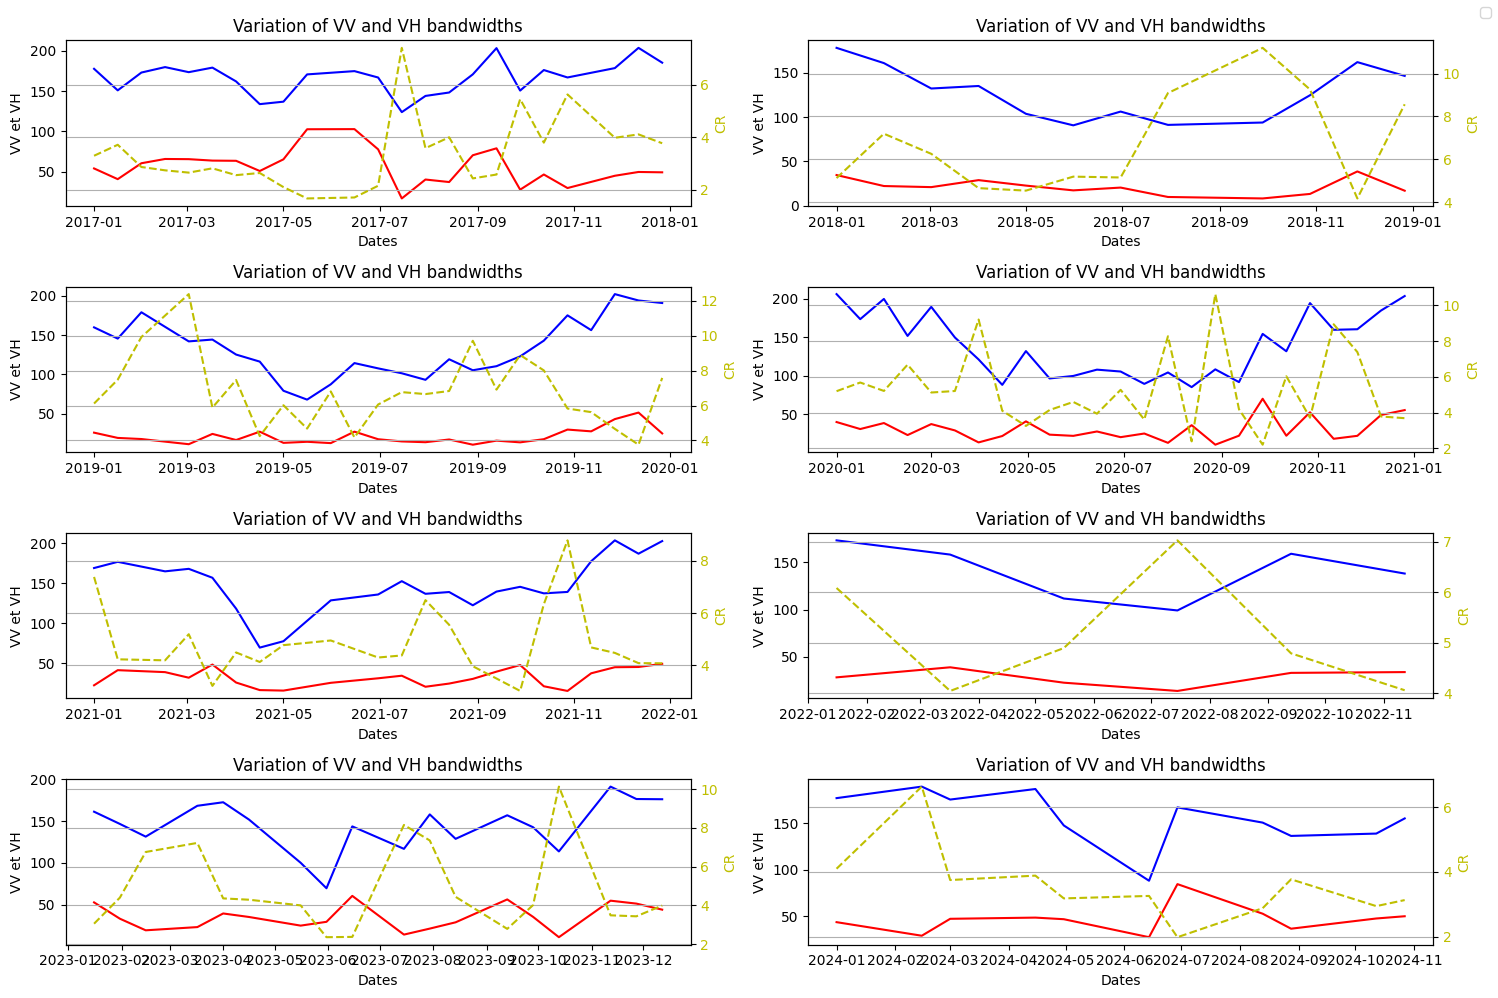

In [38]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
df_beauvais2017 = make_df("../Sentinel1_Images_Beauvais/2017")
df_beauvais2018 = make_df("../Sentinel1_Images_Beauvais/2018")
df_beauvais2019 = make_df("../Sentinel1_Images_Beauvais/2019")
df_beauvais2020 = make_df("../Sentinel1_Images_Beauvais/2020")
df_beauvais2021 = make_df("../Sentinel1_Images_Beauvais/2021")
df_beauvais2022 = make_df("../Sentinel1_Images_Beauvais/2022")
df_beauvais2023 = make_df("../Sentinel1_Images_Beauvais/2023")
df_beauvais2024 = make_df("../Sentinel1_Images_Beauvais/2024")

dfs = [df_beauvais2017, df_beauvais2018, df_beauvais2019, df_beauvais2020, df_beauvais2021, df_beauvais2022, df_beauvais2023, df_beauvais2024]

legend = True

for ax, df_subset in zip(axes.ravel(), dfs):
    if legend :
        fig.legend()
        legend = False

    plot_evolution(df_subset, (fig, ax))


plt.tight_layout()
plt.show()